<a href="https://colab.research.google.com/github/helmana/DLeeg/blob/master/model%20layers%20pop/cosin%20dist/%20orth/TEST2_cosian_dist_orth_best%20model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
'''
subject number = 109 >> 90 train subject  + 19 new subject 
channel number = 20 >> [21,23,29,31,33,35,36,40,8,10,12,41,46,48,50,52,54,60,61,62]

model3 -  1 layer pop

** subjects  (train subject (ts) , new subject (ns) ):

1) Train subject i (ts[i] )
2) Train Subject i and Train Subject j (ts[i] , ts[j] )
3) Train subject and New subject  (ts , ns)
4) New subject i ( ns[i] )
5) New Subject i and New Subject j (ns[i] , ns[j] )

'''


'\nsubject number = 109 >> 90 train subject  + 19 new subject \nchannel number = 20 >> [21,23,29,31,33,35,36,40,8,10,12,41,46,48,50,52,54,60,61,62]\n\nmodel3 -  1 layer pop\n\n** subjects  (train subject (ts) , new subject (ns) ):\n\n1) Train subject i (ts[i] )\n2) Train Subject i and Train Subject j (ts[i] , ts[j] )\n3) Train subject and New subject  (ts , ns)\n4) New subject i ( ns[i] )\n5) New Subject i and New Subject j (ns[i] , ns[j] )\n\n'

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [2]:
!pip install mne

     |████████████████████████████████| 6.4MB 2.8MB/s 


In [0]:
'''
Rivision:
980806:
  First version.
  
  

'''

'\nRivision:\n980806:\n  First version.\n  \n  \n\n'

In [0]:
# Parameters:

EpochNum=60
subject_numberT=109
RemoveBaseLine=0
Orthogonal=1
task_index = [1] # task: REO
list_channel=[61,40,10]
TryStr='Try1'
seed = 14

task_number=1
task_time = 60
sampel_number_per_sec =  160 # sampel rate
total_sampel_number =  sampel_number_per_sec *task_time # 60*160
#sample_shift = 4 #step len
inner_sample_shift = 4 # inner step len
outer_sample_shift =160  # outer step len
sample_per_window = 160
window_len= 20
batch_size=64

#Search_Space_Channel = [21,23,29,31,33,35,36,40,8,10,12,41,46,48,50,52,54,60,61,62]
#Search_Space_Channel_Name=["Fp1","Fp2","F7","F3","Fz","F4","F8","T7","C3","Cz","C4","T8","P7","P3","Pz","P4","P8","O1","Oz","O2"]


In [19]:
# For Visualization
import matplotlib
from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import Axes3D  # noqa
from shapely.geometry import LineString



# General use
import itertools
from itertools import combinations 

import os.path
from scipy.spatial import distance
import numpy as np
import math
import random
import datetime
import time
import pytz
from time import gmtime, strftime
import statistics

# General use
import itertools
from itertools import combinations 
import statistics
import csv
import os.path
from scipy.spatial import distance
import numpy as np
import math
import random
import datetime
import time
import pytz
from time import gmtime, strftime


# For model training
from keras import layers
from keras import models
from keras import regularizers
from keras.utils import to_categorical
from keras import optimizers
from keras import backend as KerasBackend
from keras.models import load_model
from keras.callbacks import EarlyStopping
from keras.callbacks import ModelCheckpoint


# EEG Tools
import mne
from mne.preprocessing import create_ecg_epochs, create_eog_epochs
from mne import io
from mne import viz
from mne import Epochs, io, pick_types
from mne.event import define_target_events
from mne.time_frequency import psd_welch
print(__doc__)



Automatically created module for IPython interactive environment


In [5]:
# load dataset in array
task_number= len(task_index)

# load dataset in array
list_raw_fnames = [[0]*task_number]*subject_numberT
for x in range(subject_numberT):
  list_raw_fnames[x] = mne.datasets.eegbci.load_data(x+1,task_index,path='/content/drive/My Drive/Deep Results/Database')

list_rawdata = np.zeros((subject_numberT,task_number), dtype='object')

for i in range(subject_numberT):
  for j in range(task_number):
    list_rawdata[i][j] = mne.io.read_raw_edf(list_raw_fnames[i][j], preload=True)


Do you want to set the path:
    /content/drive/My Drive/Deep Results/Database
as the default EEGBCI dataset path in the mne-python config [y]/n? y
Attempting to create new mne-python configuration file:
/root/.mne/mne-python.json
Extracting EDF parameters from /content/drive/My Drive/Deep Results/Database/MNE-eegbci-data/physiobank/database/eegmmidb/S001/S001R01.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 9759  =      0.000 ...    60.994 secs...
Extracting EDF parameters from /content/drive/My Drive/Deep Results/Database/MNE-eegbci-data/physiobank/database/eegmmidb/S002/S002R01.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 9759  =      0.000 ...    60.994 secs...
Extracting EDF parameters from /content/drive/My Drive/Deep Results/Database/MNE-eegbci-data/physiobank/database/eegmmidb/S003/S003R01.edf...
EDF file detected
Setting channel info structure...
Creating raw.in

In [6]:
subject_number = 90
# new subject
new_subject =np.arange(subject_number, subject_numberT)

# img for each subject
subject_img_number = math.floor((total_sampel_number - sample_per_window - (window_len-1 )*inner_sample_shift) / outer_sample_shift) +1
np.random.seed(seed)  

subject_number_array_shuffled=np.arange(subject_number)
np.random.shuffle(subject_number_array_shuffled)

subject_img_number_array_shuffled=np.arange(subject_img_number)
np.random.shuffle(subject_img_number_array_shuffled)

train_index = math.floor(len(subject_img_number_array_shuffled)* 0.75)
val_index = train_index + (train_index//5)

train_shuff = subject_img_number_array_shuffled[:train_index]
val_shuff = subject_img_number_array_shuffled[train_index:val_index]
test_shuff = subject_img_number_array_shuffled[val_index:]


train_number = len(train_shuff)
val_number = len(val_shuff)
test_number = len(test_shuff)
subject_img_number

59

In [7]:
a = [1,2,3,4,5,6]
b= [4,6,8]
c= list(set(a)-set(b))
c

[1, 2, 3, 5]

In [0]:
def normalize_channel_data(ch , i, ch_min, ch_max):
  ch = ((ch - ch_min[i]) / (ch_max[i] - ch_min[i] ))
  return ch

def ProjectionVector(VecA,VecB):
    Projeted_VecB_on_VecA=np.dot(VecA,VecB)/np.dot(VecA,VecA)*VecA
    return Projeted_VecB_on_VecA

In [0]:
#################################################################################################
## Define General Data Generator
def GenerateGeneralData(BatchSize,ListRawDataMain,SubjectArrayShuffled,ListChannel,RemoveBaseLineFlag,OrthogonalFlag,ImageArrayShuffled,WindowLen,OuterSampleShift,InnerSampleShift,SampelNumberPerSec):
    
    Iter=0
    #ch_number=len(ListChannel)
    
    
    ##########################################################
    # Pre-Proceesing On Raw Data
    ListRawDataTemp=ListRawDataMain.copy()
    
    DataAllChannelsRawPerSubject, times =(ListRawDataTemp[0][0][:64,:9600])

    DataChannelsRaw   =np.zeros((len(SubjectArrayShuffled),ch_number,times.size),dtype = float)
    DataChannelsNormal=np.zeros((len(SubjectArrayShuffled),ch_number,times.size),dtype = float)
    DataChannelsOrt   =np.zeros((len(SubjectArrayShuffled),ch_number,times.size),dtype = float)
    e= 0    
    for s in SubjectArrayShuffled:

        DataAllChannelsRawPerSubject, times =(ListRawDataTemp[s][0][:64,:9600])
        
        # Extrac Channel T9 or T10 as Baseline
        DataChannelT9Raw =DataAllChannelsRawPerSubject[43]# Ch T9 (42) or T10 (43)


        ch_max =[]
        ch_min =[]
        # Extract Selected Channels+ Remove Baseline+ Normailze
        
        for i in range(len(ListChannel)):
            DataChannelsRaw[e][i]=DataAllChannelsRawPerSubject[ListChannel[i]].copy() -DataChannelT9Raw*RemoveBaseLineFlag

            ch_max = np.append(ch_max, max(DataChannelsRaw[e][i])) # max for each cannel
            ch_min = np.append(ch_min, min(DataChannelsRaw[e][i])) # min for each cannel

            DataChannelsNormal[e][i]=normalize_channel_data(DataChannelsRaw[e][i].copy(), i, ch_min, ch_max)
        

        # Orthogonal Channel
        DataChannelsOrt[e][0]=DataChannelsNormal[e][0]
        DataChannelsOrt[e][1]=DataChannelsNormal[e][1]-ProjectionVector(DataChannelsOrt[e][0].copy(),DataChannelsNormal[e][1].copy())*OrthogonalFlag
        DataChannelsOrt[e][2]=DataChannelsNormal[e][2]-ProjectionVector(DataChannelsOrt[e][0].copy(),DataChannelsNormal[e][2].copy())*OrthogonalFlag\
                                                      -ProjectionVector(DataChannelsOrt[e][1].copy(),DataChannelsNormal[e][2].copy())*OrthogonalFlag

        e = e+1
        
    ##########################################################
    # Generate Data for Network
    while True:

      for j in ImageArrayShuffled:
          r = 0
          for s in SubjectArrayShuffled:

              if Iter ==0:
                  TrainImage=np.zeros((BatchSize, ch_number, WindowLen, sample_per_window), dtype = float)
                  TrainLabel=np.zeros((BatchSize),dtype=int)

              for i in range(len(ListChannel)):
                  for z in range (WindowLen):
                      ExtractedData = DataChannelsOrt[r][i][0+j*OuterSampleShift + z*InnerSampleShift:sample_per_window+ j*OuterSampleShift + z*InnerSampleShift]
                      TrainImage[Iter][i][z] = ExtractedData.copy()# Data
              r=r+1

              TrainLabel[Iter] = s # label

              Iter=Iter+1
              #Count=Count+1
              if Iter==BatchSize:
                Iter=0
                #print('Count=',Count)
                TrainLabelClass=to_categorical(TrainLabel,subject_numberT)
                TI = np.moveaxis(TrainImage, 1, -1)
                yield TI, TrainLabelClass 

                

In [0]:
ch_number=len(list_channel)
list_rawdataTemp=list_rawdata.copy()


In [0]:
# Construct Data Generator

GenTrainData=GenerateGeneralData(BatchSize=batch_size,
                                  ListRawDataMain=list_rawdataTemp.copy(),
                                  SubjectArrayShuffled=subject_number_array_shuffled,
                                  ListChannel=list_channel,
                                  RemoveBaseLineFlag=RemoveBaseLine,
                                  OrthogonalFlag=Orthogonal,
                                  WindowLen=window_len,
                                  OuterSampleShift=outer_sample_shift,
                                  InnerSampleShift=inner_sample_shift,
                                  SampelNumberPerSec=sampel_number_per_sec,
                                  ImageArrayShuffled=train_shuff)

GenValidationData =GenerateGeneralData(BatchSize=batch_size,
                                        ListRawDataMain=list_rawdataTemp.copy(),
                                        SubjectArrayShuffled=subject_number_array_shuffled,
                                        ListChannel=list_channel,
                                        RemoveBaseLineFlag=RemoveBaseLine,
                                        OrthogonalFlag=Orthogonal,
                                        WindowLen=window_len,
                                        OuterSampleShift=outer_sample_shift,
                                        InnerSampleShift=inner_sample_shift,
                                        SampelNumberPerSec=sampel_number_per_sec,
                                        ImageArrayShuffled=val_shuff)

GenTestData=GenerateGeneralData(BatchSize=batch_size,
                                ListRawDataMain=list_rawdataTemp.copy(),
                                SubjectArrayShuffled=subject_number_array_shuffled,
                                ListChannel=list_channel,
                                RemoveBaseLineFlag=RemoveBaseLine,
                                OrthogonalFlag=Orthogonal,
                                WindowLen=window_len,
                                OuterSampleShift=outer_sample_shift,
                                InnerSampleShift=inner_sample_shift,
                                SampelNumberPerSec=sampel_number_per_sec,
                                ImageArrayShuffled=test_shuff)

Epoch 1/50
1235/1235 [==============================] - 34s 28ms/step - loss: 2.9946 - acc: 0.1916 - val_loss: 1.8984 - val_acc: 0.4430
Epoch 2/50
1235/1235 [==============================] - 32s 26ms/step - loss: 1.5926 - acc: 0.5047 - val_loss: 0.9689 - val_acc: 0.7037
Epoch 3/50
1235/1235 [==============================] - 32s 26ms/step - loss: 0.8609 - acc: 0.7191 - val_loss: 0.6034 - val_acc: 0.7986
Epoch 4/50
1235/1235 [==============================] - 33s 26ms/step - loss: 0.5275 - acc: 0.8227 - val_loss: 0.3816 - val_acc: 0.8719
Epoch 5/50
1235/1235 [==============================] - 33s 27ms/step - loss: 0.3440 - acc: 0.8838 - val_loss: 0.1940 - val_acc: 0.9345
Epoch 6/50
1235/1235 [==============================] - 32s 26ms/step - loss: 0.2332 - acc: 0.9193 - val_loss: 0.1363 - val_acc: 0.9550
Epoch 7/50
1235/1235 [==============================] - 32s 26ms/step - loss: 0.1637 - acc: 0.9438 - val_loss: 0.0833 - val_acc: 0.9713
Epoch 8/50
1235/1235 [==========================

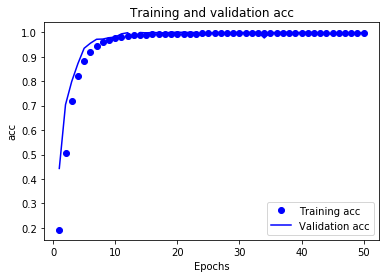

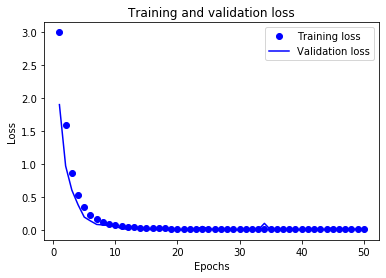

In [0]:


#################################################################################################
# Create Model
model = models.Sequential()
model.add(layers.Conv2D(128, (3,3), activation = 'relu', padding='same', input_shape = (window_len,160,ch_number) ))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(256, (3,3), activation = 'relu'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(512, (3,3), activation = 'relu'))
model.add(layers.MaxPooling2D((2,2)))

model.add(layers.Flatten())
model.add(layers.Dense(1024, activation = 'relu'))
model.add(layers.Dropout(0.25))
model.add(layers.Dense(subject_numberT, activation = 'softmax'))

model.compile(loss= 'categorical_crossentropy',
              optimizer= optimizers.RMSprop(lr= 1e-4),
              metrics = ['acc'])

#################################################################################################
filepath = '/content/drive/My Drive/mymodels/bestmodel_point.h5'
#earlystopping_callback = EarlyStopping(monitor='val_loss',verbose=0,min_delta=0,patience=10,mode='auto', restore_best_weights=True)
ModelCheckpoint_callbacks = ModelCheckpoint(filepath, monitor='val_acc', verbose=0, save_best_only=True, mode='auto', period=1)
# Train the Model
history = model.fit_generator(epochs =50,
                              generator=GenTrainData,
                              steps_per_epoch=np.ceil(train_number*subject_number/batch_size),
                              callbacks=[ModelCheckpoint_callbacks],
                              validation_data=GenValidationData,
                              validation_steps =np.ceil(val_number*subject_number/batch_size),
                              use_multiprocessing=False,
                              workers=1)

#################################################################################################
# Evalute the Model
TrainResult      =model.evaluate_generator(GenTrainData,steps=np.ceil(train_number*subject_number/batch_size))
ValidationResult =model.evaluate_generator(GenValidationData,steps=np.ceil(val_number*subject_number/batch_size))
TestResult       =model.evaluate_generator(GenTestData,steps=np.ceil(test_number*subject_number/batch_size))
print('     TrainResult ([loss , acc])=',TrainResult)
print('ValidationResult ([loss , acc])=',ValidationResult)
print('      TestResult ([loss , acc])=',TestResult)

#################################################################################################
# plot accuracy
history_dict = history.history 
acc_values = history_dict ['acc'] 
val_acc_values = history_dict['val_acc']
epochs = range(1, len(acc_values) + 1)


#plt.clf()
plt.plot(epochs, acc_values, 'bo', label='Training acc') 
plt.plot(epochs, val_acc_values, 'b', label='Validation acc') 
plt.title('Training and validation acc') 
plt.xlabel('Epochs') 
plt.ylabel('acc') 
plt.legend()
plt.show()

history_dict = history.history 
loss_values = history_dict ['loss'] 
val_loss_values = history_dict['val_loss']
epochs = range(1, len(loss_values) + 1)

plt.plot(epochs, loss_values, 'bo', label='Training loss') 
plt.plot(epochs, val_loss_values, 'b', label='Validation loss') 
plt.title('Training and validation loss') 
plt.xlabel('Epochs') 
plt.ylabel('Loss') 
plt.legend()
plt.show()

In [0]:
#model.save('/content/drive/My Drive/mymodels/finalmodel_orth_Oz_T7_C3.h5')

In [11]:
model = load_model('/content/drive/My Drive/mymodels/bestmodel_point.h5')
model.summary()
model.pop()
model.pop()
model.summary()






Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.








Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 20, 160, 128)      3584      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 10, 80, 128)       0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 8, 78, 256)        295168    
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 4, 39, 256)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 2, 37, 512)        1180160   
____________________________

/usr/local/lib/python3.6/dist-packages/keras/engine/training.py:493: UserWarning: Discrepancy between trainable weights and collected trainable weights, did you set `model.trainable` without calling `model.compile` after ?
  'Discrepancy between trainable weights and collected trainable'


     TrainResult ([loss , acc])= [0.00010601813004244913, 1.0]
ValidationResult ([loss , acc])= [0.00021139885681026248, 1.0]
      TestResult ([loss , acc])= [0.0003442101747798707, 1.0]


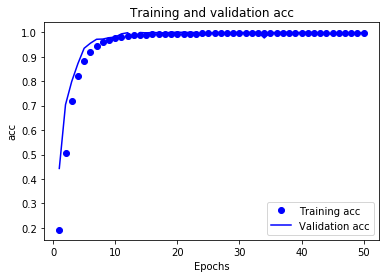

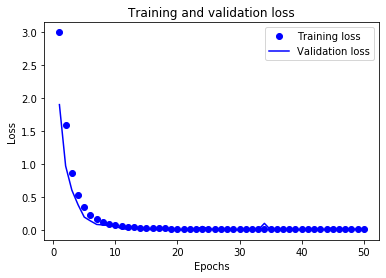

In [0]:
# Evalute the Model
TrainResult      =model.evaluate_generator(GenTrainData,steps=np.ceil(train_number*subject_number/batch_size))
ValidationResult =model.evaluate_generator(GenValidationData,steps=np.ceil(val_number*subject_number/batch_size))
TestResult       =model.evaluate_generator(GenTestData,steps=np.ceil(test_number*subject_number/batch_size))
print('     TrainResult ([loss , acc])=',TrainResult)
print('ValidationResult ([loss , acc])=',ValidationResult)
print('      TestResult ([loss , acc])=',TestResult)

#################################################################################################
# plot accuracy
history_dict = history.history 
acc_values = history_dict ['acc'] 
val_acc_values = history_dict['val_acc']
epochs = range(1, len(acc_values) + 1)


#plt.clf()
plt.plot(epochs, acc_values, 'bo', label='Training acc') 
plt.plot(epochs, val_acc_values, 'b', label='Validation acc') 
plt.title('Training and validation acc') 
plt.xlabel('Epochs') 
plt.ylabel('acc') 
plt.legend()
plt.show()

history_dict = history.history 
loss_values = history_dict ['loss'] 
val_loss_values = history_dict['val_loss']
epochs = range(1, len(loss_values) + 1)

plt.plot(epochs, loss_values, 'bo', label='Training loss') 
plt.plot(epochs, val_loss_values, 'b', label='Validation loss') 
plt.title('Training and validation loss') 
plt.xlabel('Epochs') 
plt.ylabel('Loss') 
plt.legend()
plt.show()

In [0]:
def subject_Predict_generator(batch_size, mymodel, subject_arr, img_arr ):
  sn = len(subject_arr)
  imgn = len(img_arr)
  pre_GenTestData=GenerateGeneralData(BatchSize=batch_size,
                                  ListRawDataMain=list_rawdataTemp.copy(),
                                  SubjectArrayShuffled= subject_arr,
                                  ListChannel=list_channel,
                                  RemoveBaseLineFlag=RemoveBaseLine,
                                  OrthogonalFlag=Orthogonal,
                                  WindowLen=window_len,
                                  OuterSampleShift=outer_sample_shift,
                                  InnerSampleShift=inner_sample_shift,
                                  SampelNumberPerSec=sampel_number_per_sec,
                                  ImageArrayShuffled= img_arr)

  pre_Subject = mymodel.predict_generator(pre_GenTestData,steps=np.ceil(imgn*sn/batch_size))
  return pre_Subject


total_vector=[]
subject_img_idx_array = np.arange(subject_img_number)

for i in range(109):
  Si_vectors = subject_Predict_generator(len(subject_img_idx_array), model, [i], subject_img_idx_array)
  total_vector.append(Si_vectors)

In [12]:
import h5py
#hf = h5py.File('/content/drive/My Drive/mymodels/vectors/bestpointmodel_total_vectors_orth_Oz_T7_C3_160_spw.h5', 'w')
#hf.create_dataset('/content/drive/My Drive/mymodels/vectors/dataset_total_vectors', data=total_vector)
#hf.close()
hf = h5py.File('/content/drive/My Drive/mymodels/vectors/bestpointmodel_total_vectors_orth_Oz_T7_C3_160_spw.h5', 'r')
vec = hf.get('/content/drive/My Drive/mymodels/vectors/dataset_total_vectors')
vec


<HDF5 dataset "dataset_total_vectors": shape (109, 59, 1024), type "<f4">

In [0]:
### verification with middle of samples

def VerifySubject(threshold, s1, smp1, s2, smp2):
  list_d =[]

  for i in range(len(smp1)):
    #print(s1 ,vec1[i] )
    d= distance.cosine(vec[s1][smp1[i]], vec[s2][smp2[i]])
    list_d.append(d)
  midd = statistics.median_low(list_d)

  if (midd) <threshold :
    return 0 # same
  else:
    return 1 # different


In [0]:
from shapely.geometry import LineString



In [0]:
### generate data for verification
def counter_true_false_result(start_index_s1, end_index_s1 ,start_index_s2, end_index_s2 ):
  tryatr="try7_3000"
  threshold = 0
  pair_number = 3000
  sample_img_num = 25
  Batch_size = 25
  ITER = pair_number //2


  path = "/content/drive/My Drive/Orth_cosian/"+tryatr+" best point model- cosian dist_true ORTH new model" +str(sample_img_num)+"sample num_"+str(pair_number)+"pair_"+ "ouer shift" + str(outer_sample_shift)

  try:
      os.mkdir(path)
  except OSError:
      print ("Creation of the directory %s failed" % path)
  else:
      print ("Successfully created the directory %s " % path)



  
  ## CSV file name 
  csvFileName =str(sample_img_num)+"sample num_"+str(pair_number)+"pair"+ "_MIDDLE threshold_S1(" + str(start_index_s1)+ "-" + str(end_index_s1) + ")_S2("+ str(start_index_s2)+ "-" + str(end_index_s2) + ")" +".csv"
  completeName = os.path.join(path, csvFileName )

  png_FileName =str(sample_img_num)+"sample num_"+str(pair_number)+"pair"+ "_MIDDLE threshold_S1(" + str(start_index_s1)+ "-" + str(end_index_s1) + ")_S2("+ str(start_index_s2)+ "-" + str(end_index_s2) + ")" +".png"
  png_completeName = os.path.join(path, png_FileName )

  list_threshold = []
  list_TP = []
  list_TN = []
  list_FP = []
  list_FN = []
  list_FRR = []
  list_FAR = []
  list_EER = []
  list_Correct_Verifi_Percentage = []
  list_threshold_result =[]


  for j in range(1,15):

      threshold =0.225+ (j*0.01)
      threshold = round(threshold,4)
      #threshold = j
      TP =0
      TN =0
      FP =0
      FN =0
      FAR =0
      FRR =0
      EER =0
      true_result= 0
      false_result = 0
      Correct_Verifi_Percentage = 0

      for i in range(ITER):
        
          # subject 1 Genuine
          S1_rand = random.randint(start_index_s1, end_index_s1)
          # shuffled img indx array
          pre_S1_img_shuffled = np.arange(subject_img_number)
          np.random.shuffle(pre_S1_img_shuffled)

          # group sample 1
          S1_Sample_rand1 = pre_S1_img_shuffled[:sample_img_num]
          # group sample 2
          S1_Sample_rand2 = pre_S1_img_shuffled[sample_img_num : sample_img_num *2]

          # Genuine verify
          result1 = VerifySubject( threshold, S1_rand, S1_Sample_rand1, S1_rand, S1_Sample_rand2)
          
          if result1 == 0:
            true_result = true_result+1
            TP = TP +1 #TP
          else:
            false_result = false_result+1
            FN = FN +1

          # subject 2
          S2_rand = random.randint(start_index_s2, end_index_s2)
          while S2_rand == S1_rand:
            S2_rand = random.randint(start_index_s2, end_index_s2)

          # shuffled img indx array
          pre_S2_img_shuffled=np.arange(subject_img_number)
          np.random.shuffle(pre_S2_img_shuffled)
          # group sample
          S2_Sample_rand = pre_S2_img_shuffled[:sample_img_num]

          # Impostor vrify
          result2 = VerifySubject( threshold, S1_rand, S1_Sample_rand1, S2_rand, S2_Sample_rand)

          if result2 == 1:
            true_result = true_result+1
            TN = TN +1
          else: 
            false_result = false_result+1
            FP = FP +1
        
      #print(result1 , result2)
      Correct_Verifi_Percentage = (true_result *100) / (true_result + false_result)
      FAR = FP / (FP+TN)
      FRR = FN / (FN+TP)
      EER = (FAR+FRR) / 2

      list_threshold.append(threshold)
      list_TP.append(TP)
      list_TN.append(TN)
      list_FP.append(FP)
      list_FN.append(FN)
      list_FAR.append(FAR)
      list_FRR.append(FRR)
      list_EER.append(EER)
      list_Correct_Verifi_Percentage.append(Correct_Verifi_Percentage)
      ## print result
      print(j,') ' ,threshold,'.', '\n', Correct_Verifi_Percentage,'%','\n',"true_result:",true_result,"false_result:",false_result,'\n',"TP:",TP,"FN:",FN,"FRR:",FRR ,'\n',"TN:",TN,"FP:",FP,"FAR:", FAR,'\n',"EER:",EER,'\n' )
  
  x= np.array(list_FRR )
  #f= np.array(list_FRR )
  g= np.array(list_FAR )
  x1 = np.array([0,0.08])
  g1 = np.array([0,0.08])

  plt.figure(figsize=(10,10))

  i= 0
  # zip joins x and y coordinates in pairs
  for a,b in zip(x, g):
      #thr_round = list_threshold[i]
      label = str(i)
      i= i+1

      plt.annotate(label, (a,b))


  plt.plot(x, g)
  plt.plot(x1, g1)

  first_line = LineString(np.column_stack((x, g)))
  second_line = LineString(np.column_stack((x1, g1)))
  intersection = first_line.intersection(second_line)
  plt.plot(intersection,intersection, 'o')
  print(intersection)
 
 
  plt.xlabel('FRR') 
  plt.ylabel('FAR') 
  plt.legend()

  plt.savefig(png_completeName) 
  #bob.measure.plot.det(list_FRR,list_FAR)
  #%matplotlib qt

  print("####" +"S1(" + str(start_index_s1)+ "-" + str(end_index_s1) + ")_S2("+ str(start_index_s2)+ "-" + str(end_index_s2) + ")")

  list_threshold_result.append([(list_threshold[j], list_Correct_Verifi_Percentage[j], list_FAR[j], list_FRR[j] , list_EER[j], list_TP[j], list_FN[j], list_TN[j], list_FP[j] ) for j in range(len(list_Correct_Verifi_Percentage)) ])

  with open(completeName, 'w+') as csvfile:
    spamwriter = csv.writer(csvfile, delimiter=',',
                          quotechar='|', quoting=csv.QUOTE_MINIMAL)
    spamwriter.writerows(list_threshold_result[0])



Successfully created the directory /content/drive/My Drive/Orth_cosian/try7_3000 best point model- cosian dist_true ORTH new model25sample num_3000pair_ouer shift160 
1 )  0.235 . 
 96.63333333333334 % 
 true_result: 2899 false_result: 101 
 TP: 1414 FN: 86 FRR: 0.05733333333333333 
 TN: 1485 FP: 15 FAR: 0.01 
 EER: 0.033666666666666664 

2 )  0.245 . 
 96.8 % 
 true_result: 2904 false_result: 96 
 TP: 1438 FN: 62 FRR: 0.04133333333333333 
 TN: 1466 FP: 34 FAR: 0.02266666666666667 
 EER: 0.032 

3 )  0.255 . 
 97.13333333333334 % 
 true_result: 2914 false_result: 86 
 TP: 1448 FN: 52 FRR: 0.034666666666666665 
 TN: 1466 FP: 34 FAR: 0.02266666666666667 
 EER: 0.028666666666666667 

4 )  0.265 . 
 97.56666666666666 % 
 true_result: 2927 false_result: 73 
 TP: 1467 FN: 33 FRR: 0.022 
 TN: 1460 FP: 40 FAR: 0.02666666666666667 
 EER: 0.024333333333333332 

5 )  0.275 . 
 97.9 % 
 true_result: 2937 false_result: 63 
 TP: 1481 FN: 19 FRR: 0.012666666666666666 
 TN: 1456 FP: 44 FAR: 0.02933333

No handles with labels found to put in legend.


14 )  0.365 . 
 94.86666666666666 % 
 true_result: 2846 false_result: 154 
 TP: 1500 FN: 0 FRR: 0.0 
 TN: 1346 FP: 154 FAR: 0.10266666666666667 
 EER: 0.051333333333333335 

POINT (0.02554666666666667 0.02554666666666667)
####S1(0-89)_S2(0-89)
Creation of the directory /content/drive/My Drive/Orth_cosian/try7_3000 best point model- cosian dist_true ORTH new model25sample num_3000pair_ouer shift160 failed
1 )  0.235 . 
 96.4 % 
 true_result: 2892 false_result: 108 
 TP: 1409 FN: 91 FRR: 0.06066666666666667 
 TN: 1483 FP: 17 FAR: 0.011333333333333334 
 EER: 0.036000000000000004 

2 )  0.245 . 
 97.2 % 
 true_result: 2916 false_result: 84 
 TP: 1436 FN: 64 FRR: 0.042666666666666665 
 TN: 1480 FP: 20 FAR: 0.013333333333333334 
 EER: 0.028 

3 )  0.255 . 
 97.36666666666666 % 
 true_result: 2921 false_result: 79 
 TP: 1446 FN: 54 FRR: 0.036 
 TN: 1475 FP: 25 FAR: 0.016666666666666666 
 EER: 0.026333333333333334 

4 )  0.265 . 
 97.83333333333333 % 
 true_result: 2935 false_result: 65 
 TP: 

No handles with labels found to put in legend.


14 )  0.365 . 
 94.93333333333334 % 
 true_result: 2848 false_result: 152 
 TP: 1500 FN: 0 FRR: 0.0 
 TN: 1348 FP: 152 FAR: 0.10133333333333333 
 EER: 0.050666666666666665 

POINT (0.02210416666666667 0.02210416666666667)
####S1(0-89)_S2(90-108)
Creation of the directory /content/drive/My Drive/Orth_cosian/try7_3000 best point model- cosian dist_true ORTH new model25sample num_3000pair_ouer shift160 failed
1 )  0.235 . 
 90.9 % 
 true_result: 2727 false_result: 273 
 TP: 1241 FN: 259 FRR: 0.17266666666666666 
 TN: 1486 FP: 14 FAR: 0.009333333333333334 
 EER: 0.091 

2 )  0.245 . 
 93.33333333333333 % 
 true_result: 2800 false_result: 200 
 TP: 1322 FN: 178 FRR: 0.11866666666666667 
 TN: 1478 FP: 22 FAR: 0.014666666666666666 
 EER: 0.06666666666666667 

3 )  0.255 . 
 94.63333333333334 % 
 true_result: 2839 false_result: 161 
 TP: 1371 FN: 129 FRR: 0.086 
 TN: 1468 FP: 32 FAR: 0.021333333333333333 
 EER: 0.05366666666666666 

4 )  0.265 . 
 96.16666666666667 % 
 true_result: 2885 false_

No handles with labels found to put in legend.


14 )  0.365 . 
 95.3 % 
 true_result: 2859 false_result: 141 
 TP: 1500 FN: 0 FRR: 0.0 
 TN: 1359 FP: 141 FAR: 0.094 
 EER: 0.047 

POINT (0.02316190476190477 0.02316190476190476)
####S1(90-108)_S2(0-89)
Creation of the directory /content/drive/My Drive/Orth_cosian/try7_3000 best point model- cosian dist_true ORTH new model25sample num_3000pair_ouer shift160 failed
1 )  0.235 . 
 90.8 % 
 true_result: 2724 false_result: 276 
 TP: 1224 FN: 276 FRR: 0.184 
 TN: 1500 FP: 0 FAR: 0.0 
 EER: 0.092 

2 )  0.245 . 
 93.8 % 
 true_result: 2814 false_result: 186 
 TP: 1315 FN: 185 FRR: 0.12333333333333334 
 TN: 1499 FP: 1 FAR: 0.0006666666666666666 
 EER: 0.062 

3 )  0.255 . 
 95.63333333333334 % 
 true_result: 2869 false_result: 131 
 TP: 1375 FN: 125 FRR: 0.08333333333333333 
 TN: 1494 FP: 6 FAR: 0.004 
 EER: 0.043666666666666666 

4 )  0.265 . 
 97.66666666666667 % 
 true_result: 2930 false_result: 70 
 TP: 1438 FN: 62 FRR: 0.04133333333333333 
 TN: 1492 FP: 8 FAR: 0.005333333333333333 
 EER

No handles with labels found to put in legend.


14 )  0.365 . 
 95.03333333333333 % 
 true_result: 2851 false_result: 149 
 TP: 1500 FN: 0 FRR: 0.0 
 TN: 1351 FP: 149 FAR: 0.09933333333333333 
 EER: 0.049666666666666665 

POINT (0.01747826086956522 0.01747826086956522)
####S1(90-108)_S2(90-108)
Creation of the directory /content/drive/My Drive/Orth_cosian/try7_3000 best point model- cosian dist_true ORTH new model25sample num_3000pair_ouer shift160 failed
1 )  0.235 . 
 95.53333333333333 % 
 true_result: 2866 false_result: 134 
 TP: 1383 FN: 117 FRR: 0.078 
 TN: 1483 FP: 17 FAR: 0.011333333333333334 
 EER: 0.04466666666666667 

2 )  0.245 . 
 96.36666666666666 % 
 true_result: 2891 false_result: 109 
 TP: 1408 FN: 92 FRR: 0.06133333333333333 
 TN: 1483 FP: 17 FAR: 0.011333333333333334 
 EER: 0.03633333333333333 

3 )  0.255 . 
 97.43333333333334 % 
 true_result: 2923 false_result: 77 
 TP: 1445 FN: 55 FRR: 0.03666666666666667 
 TN: 1478 FP: 22 FAR: 0.014666666666666666 
 EER: 0.025666666666666667 

4 )  0.265 . 
 97.8 % 
 true_resul

No handles with labels found to put in legend.


14 )  0.365 . 
 94.36666666666666 % 
 true_result: 2831 false_result: 169 
 TP: 1500 FN: 0 FRR: 0.0 
 TN: 1331 FP: 169 FAR: 0.11266666666666666 
 EER: 0.05633333333333333 

POINT (0.022 0.022)
####S1(0-108)_S2(0-108)


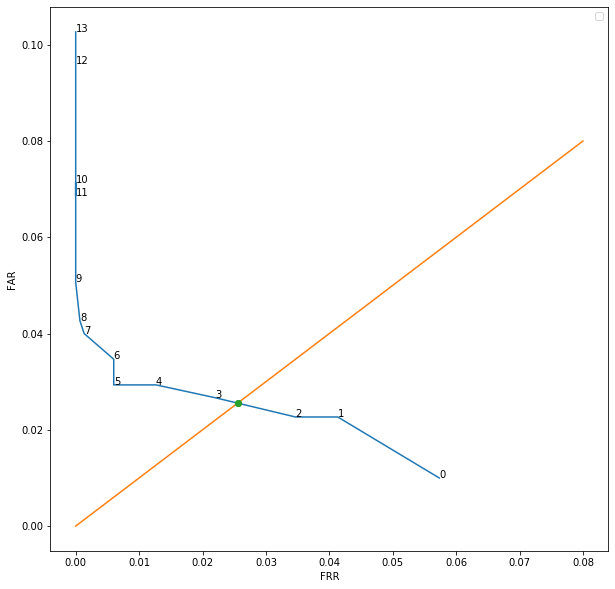

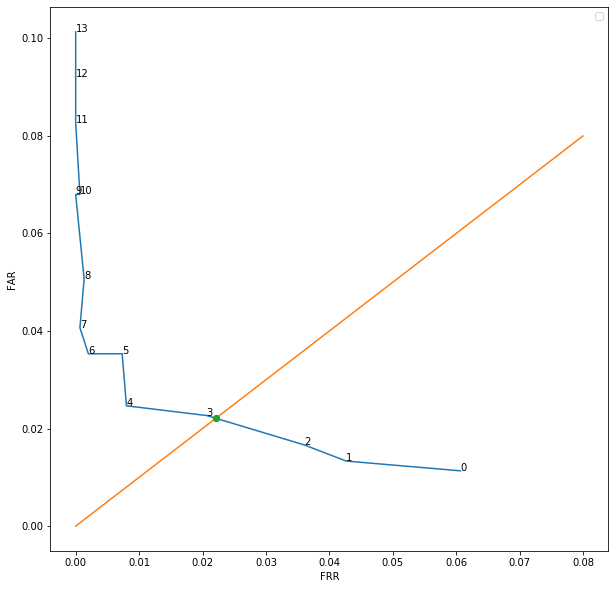

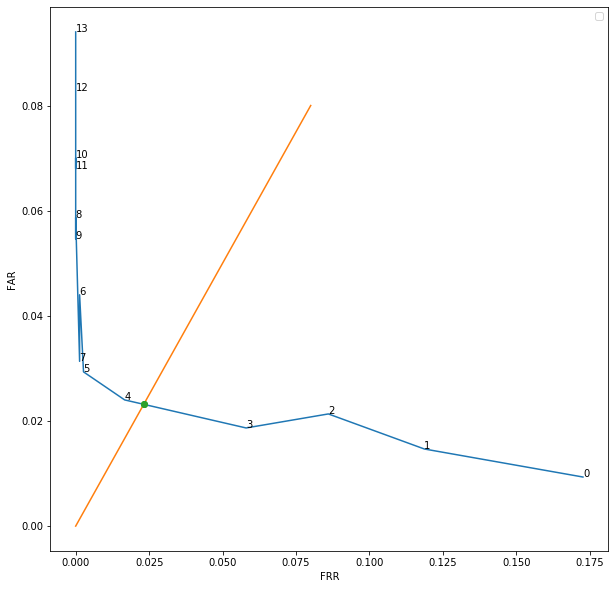

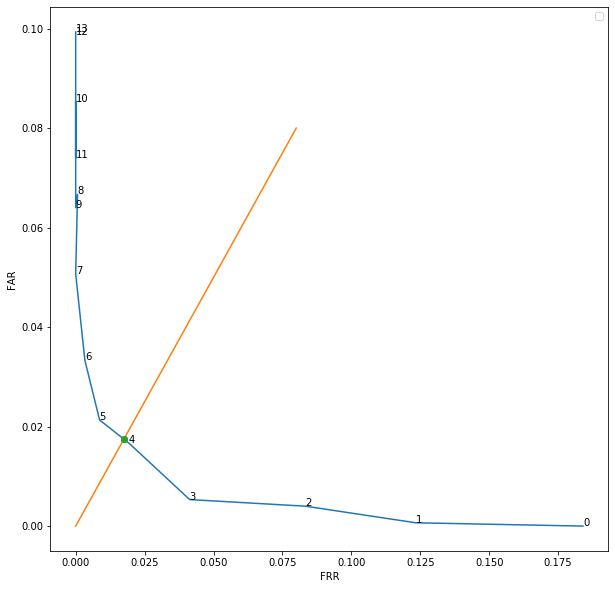

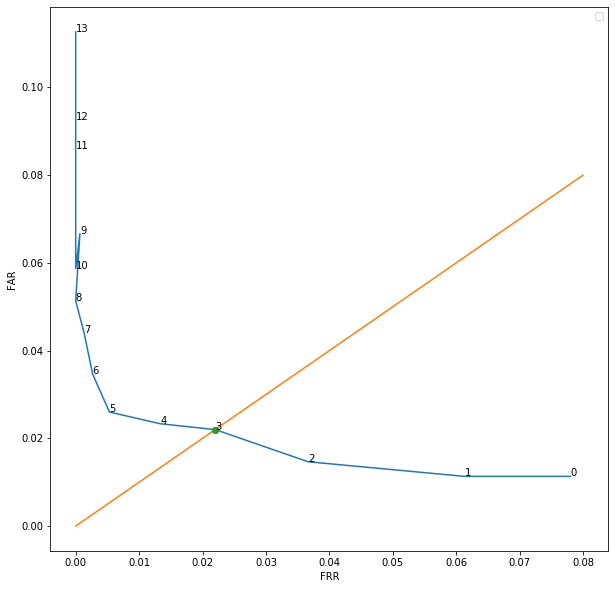

In [26]:
#1. train subject , train subject
counter_true_false_result(0,89,0,89) 

#2. train subject , new subject
counter_true_false_result(0,89, 90,108)

#3. new subject , new subject
counter_true_false_result(90,108, 0,89)

#4. new subject , new subject
counter_true_false_result(90,108, 90,108)

#5. all subject , all subject
counter_true_false_result(0,108, 0,108)

Successfully created the directory /content/drive/My Drive/Orth_cosian/try6-1 best point model- cosian dist_true ORTH new model25sample num_2000pair_ouer shift160 
1 )  0.235 . 
 96.1 % 
 true_result: 1922 false_result: 78 
 TP: 933 FN: 67 FRR: 0.067 
 TN: 989 FP: 11 FAR: 0.011 
 EER: 0.039 

2 )  0.245 . 
 96.65 % 
 true_result: 1933 false_result: 67 
 TP: 954 FN: 46 FRR: 0.046 
 TN: 979 FP: 21 FAR: 0.021 
 EER: 0.0335 

3 )  0.255 . 
 97.75 % 
 true_result: 1955 false_result: 45 
 TP: 967 FN: 33 FRR: 0.033 
 TN: 988 FP: 12 FAR: 0.012 
 EER: 0.0225 

4 )  0.265 . 
 97.5 % 
 true_result: 1950 false_result: 50 
 TP: 974 FN: 26 FRR: 0.026 
 TN: 976 FP: 24 FAR: 0.024 
 EER: 0.025 

5 )  0.275 . 
 97.95 % 
 true_result: 1959 false_result: 41 
 TP: 987 FN: 13 FRR: 0.013 
 TN: 972 FP: 28 FAR: 0.028 
 EER: 0.0205 

6 )  0.285 . 
 97.7 % 
 true_result: 1954 false_result: 46 
 TP: 992 FN: 8 FRR: 0.008 
 TN: 962 FP: 38 FAR: 0.038 
 EER: 0.023 

7 )  0.295 . 
 97.7 % 
 true_result: 1954 false_res

No handles with labels found to put in legend.


14 )  0.365 . 
 95.05 % 
 true_result: 1901 false_result: 99 
 TP: 1000 FN: 0 FRR: 0.0 
 TN: 901 FP: 99 FAR: 0.099 
 EER: 0.0495 

POINT (0.02447058823529412 0.02447058823529412)
####S1(0-89)_S2(0-89)
Creation of the directory /content/drive/My Drive/Orth_cosian/try6-1 best point model- cosian dist_true ORTH new model25sample num_2000pair_ouer shift160 failed
1 )  0.235 . 
 96.2 % 
 true_result: 1924 false_result: 76 
 TP: 940 FN: 60 FRR: 0.06 
 TN: 984 FP: 16 FAR: 0.016 
 EER: 0.038 

2 )  0.245 . 
 96.95 % 
 true_result: 1939 false_result: 61 
 TP: 952 FN: 48 FRR: 0.048 
 TN: 987 FP: 13 FAR: 0.013 
 EER: 0.0305 

3 )  0.255 . 
 97.3 % 
 true_result: 1946 false_result: 54 
 TP: 968 FN: 32 FRR: 0.032 
 TN: 978 FP: 22 FAR: 0.022 
 EER: 0.027 

4 )  0.265 . 
 97.45 % 
 true_result: 1949 false_result: 51 
 TP: 971 FN: 29 FRR: 0.029 
 TN: 978 FP: 22 FAR: 0.022 
 EER: 0.025500000000000002 

5 )  0.275 . 
 98.65 % 
 true_result: 1973 false_result: 27 
 TP: 994 FN: 6 FRR: 0.006 
 TN: 979 FP: 

No handles with labels found to put in legend.


14 )  0.365 . 
 93.85 % 
 true_result: 1877 false_result: 123 
 TP: 1000 FN: 0 FRR: 0.0 
 TN: 877 FP: 123 FAR: 0.123 
 EER: 0.0615 

POINT (0.02168181818181818 0.02168181818181818)
####S1(0-89)_S2(90-108)
Creation of the directory /content/drive/My Drive/Orth_cosian/try6-1 best point model- cosian dist_true ORTH new model25sample num_2000pair_ouer shift160 failed
1 )  0.235 . 
 89.05 % 
 true_result: 1781 false_result: 219 
 TP: 792 FN: 208 FRR: 0.208 
 TN: 989 FP: 11 FAR: 0.011 
 EER: 0.1095 

2 )  0.245 . 
 91.45 % 
 true_result: 1829 false_result: 171 
 TP: 848 FN: 152 FRR: 0.152 
 TN: 981 FP: 19 FAR: 0.019 
 EER: 0.08549999999999999 

3 )  0.255 . 
 95.3 % 
 true_result: 1906 false_result: 94 
 TP: 928 FN: 72 FRR: 0.072 
 TN: 978 FP: 22 FAR: 0.022 
 EER: 0.047 

4 )  0.265 . 
 96.3 % 
 true_result: 1926 false_result: 74 
 TP: 953 FN: 47 FRR: 0.047 
 TN: 973 FP: 27 FAR: 0.027 
 EER: 0.037 

5 )  0.275 . 
 97.9 % 
 true_result: 1958 false_result: 42 
 TP: 988 FN: 12 FRR: 0.012 
 TN: 

No handles with labels found to put in legend.


14 )  0.365 . 
 94.3 % 
 true_result: 1886 false_result: 114 
 TP: 1000 FN: 0 FRR: 0.0 
 TN: 886 FP: 114 FAR: 0.114 
 EER: 0.057 

POINT (0.02857894736842105 0.02857894736842105)
####S1(90-108)_S2(0-89)
Creation of the directory /content/drive/My Drive/Orth_cosian/try6-1 best point model- cosian dist_true ORTH new model25sample num_2000pair_ouer shift160 failed
1 )  0.235 . 
 89.95 % 
 true_result: 1799 false_result: 201 
 TP: 800 FN: 200 FRR: 0.2 
 TN: 999 FP: 1 FAR: 0.001 
 EER: 0.1005 

2 )  0.245 . 
 93.2 % 
 true_result: 1864 false_result: 136 
 TP: 866 FN: 134 FRR: 0.134 
 TN: 998 FP: 2 FAR: 0.002 
 EER: 0.068 

3 )  0.255 . 
 96.0 % 
 true_result: 1920 false_result: 80 
 TP: 923 FN: 77 FRR: 0.077 
 TN: 997 FP: 3 FAR: 0.003 
 EER: 0.04 

4 )  0.265 . 
 97.9 % 
 true_result: 1958 false_result: 42 
 TP: 960 FN: 40 FRR: 0.04 
 TN: 998 FP: 2 FAR: 0.002 
 EER: 0.021 

5 )  0.275 . 
 98.1 % 
 true_result: 1962 false_result: 38 
 TP: 979 FN: 21 FRR: 0.021 
 TN: 983 FP: 17 FAR: 0.017 
 E

No handles with labels found to put in legend.


14 )  0.365 . 
 95.2 % 
 true_result: 1904 false_result: 96 
 TP: 1000 FN: 0 FRR: 0.0 
 TN: 904 FP: 96 FAR: 0.096 
 EER: 0.048 

POINT (0.017 0.017)
####S1(90-108)_S2(90-108)
Creation of the directory /content/drive/My Drive/Orth_cosian/try6-1 best point model- cosian dist_true ORTH new model25sample num_2000pair_ouer shift160 failed
1 )  0.235 . 
 94.65 % 
 true_result: 1893 false_result: 107 
 TP: 904 FN: 96 FRR: 0.096 
 TN: 989 FP: 11 FAR: 0.011 
 EER: 0.0535 

2 )  0.245 . 
 96.0 % 
 true_result: 1920 false_result: 80 
 TP: 936 FN: 64 FRR: 0.064 
 TN: 984 FP: 16 FAR: 0.016 
 EER: 0.04 

3 )  0.255 . 
 97.2 % 
 true_result: 1944 false_result: 56 
 TP: 958 FN: 42 FRR: 0.042 
 TN: 986 FP: 14 FAR: 0.014 
 EER: 0.028 

4 )  0.265 . 
 97.8 % 
 true_result: 1956 false_result: 44 
 TP: 975 FN: 25 FRR: 0.025 
 TN: 981 FP: 19 FAR: 0.019 
 EER: 0.022 

5 )  0.275 . 
 97.85 % 
 true_result: 1957 false_result: 43 
 TP: 988 FN: 12 FRR: 0.012 
 TN: 969 FP: 31 FAR: 0.031 
 EER: 0.0215 

6 )  0.285

No handles with labels found to put in legend.


14 )  0.365 . 
 95.2 % 
 true_result: 1904 false_result: 96 
 TP: 1000 FN: 0 FRR: 0.0 
 TN: 904 FP: 96 FAR: 0.096 
 EER: 0.048 

POINT (0.02188 0.02188)
####S1(0-108)_S2(0-108)


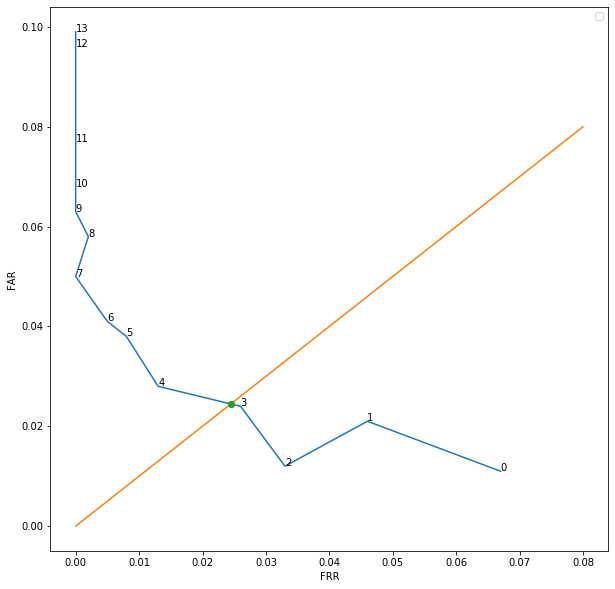

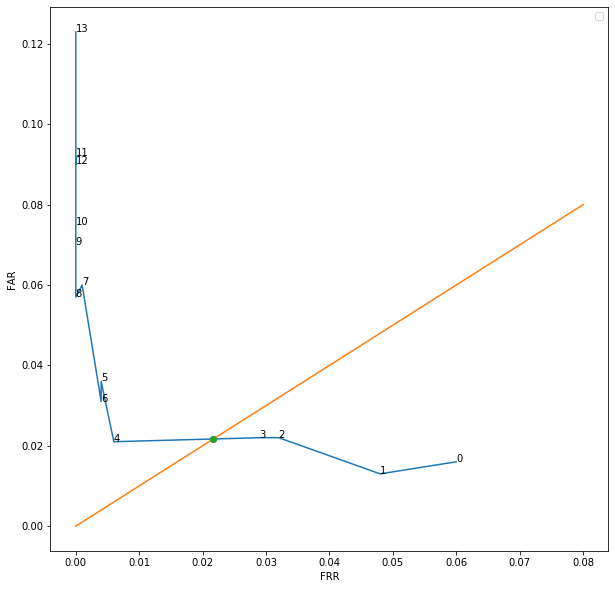

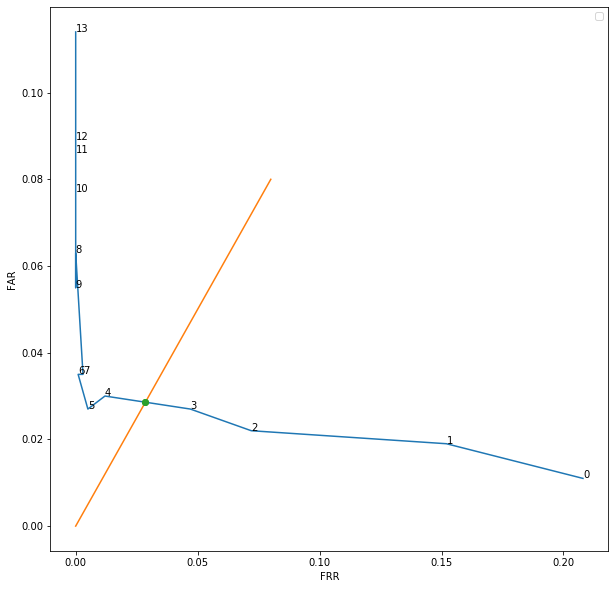

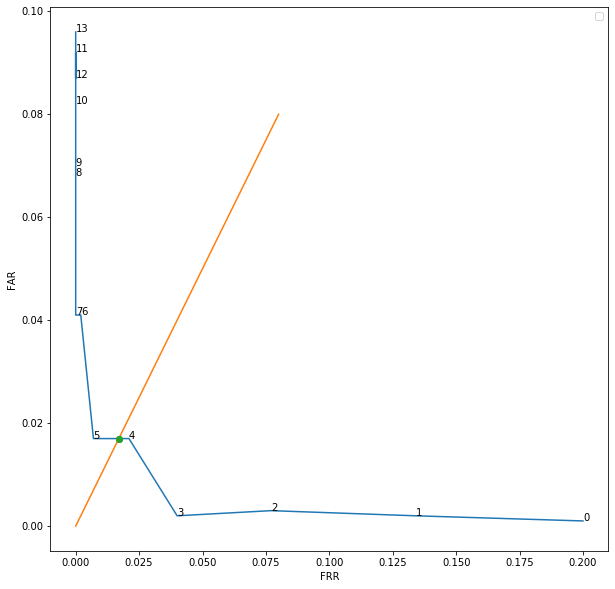

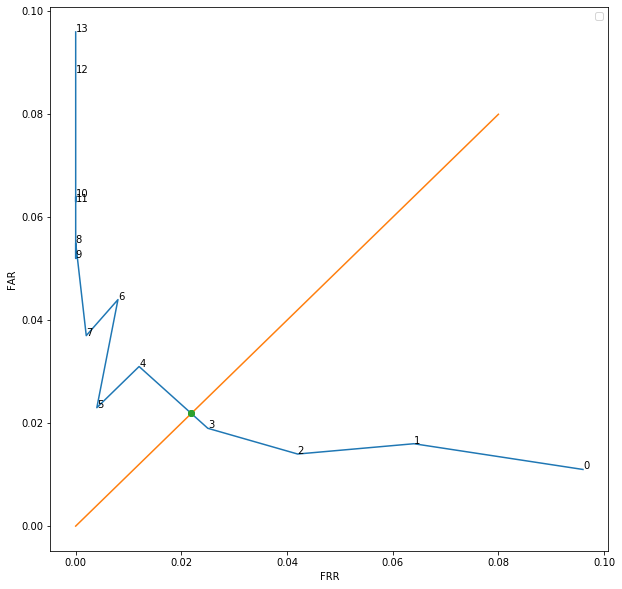

In [24]:
#1. train subject , train subject
counter_true_false_result(0,89,0,89) 

#2. train subject , new subject
counter_true_false_result(0,89, 90,108)

#3. new subject , new subject
counter_true_false_result(90,108, 0,89)

#4. new subject , new subject
counter_true_false_result(90,108, 90,108)

#5. all subject , all subject
counter_true_false_result(0,108, 0,108)

Creation of the directory /content/drive/My Drive/Orth_cosian/try5 best point model- cosian dist_true ORTH new model25sample num_2000pair_ouer shift160 failed
1 )  0.235 . 
 95.5 % 
 true_result: 1910 false_result: 90 
 TP: 919 FN: 81 FRR: 0.081 
 TN: 991 FP: 9 FAR: 0.009 
 EER: 0.045 

2 )  0.245 . 
 96.65 % 
 true_result: 1933 false_result: 67 
 TP: 949 FN: 51 FRR: 0.051 
 TN: 984 FP: 16 FAR: 0.016 
 EER: 0.0335 

3 )  0.255 . 
 98.1 % 
 true_result: 1962 false_result: 38 
 TP: 972 FN: 28 FRR: 0.028 
 TN: 990 FP: 10 FAR: 0.01 
 EER: 0.019 

4 )  0.265 . 
 97.55 % 
 true_result: 1951 false_result: 49 
 TP: 974 FN: 26 FRR: 0.026 
 TN: 977 FP: 23 FAR: 0.023 
 EER: 0.0245 

5 )  0.275 . 
 97.95 % 
 true_result: 1959 false_result: 41 
 TP: 982 FN: 18 FRR: 0.018 
 TN: 977 FP: 23 FAR: 0.023 
 EER: 0.020499999999999997 

6 )  0.285 . 
 98.35 % 
 true_result: 1967 false_result: 33 
 TP: 994 FN: 6 FRR: 0.006 
 TN: 973 FP: 27 FAR: 0.027 
 EER: 0.0165 

7 )  0.295 . 
 98.05 % 
 true_result: 1961

No handles with labels found to put in legend.


14 )  0.365 . 
 94.85 % 
 true_result: 1897 false_result: 103 
 TP: 1000 FN: 0 FRR: 0.0 
 TN: 897 FP: 103 FAR: 0.103 
 EER: 0.0515 

POINT (0.023 0.023)
####S1(0-89)_S2(0-89)
Creation of the directory /content/drive/My Drive/Orth_cosian/try5 best point model- cosian dist_true ORTH new model25sample num_2000pair_ouer shift160 failed
1 )  0.235 . 
 96.25 % 
 true_result: 1925 false_result: 75 
 TP: 941 FN: 59 FRR: 0.059 
 TN: 984 FP: 16 FAR: 0.016 
 EER: 0.0375 

2 )  0.245 . 
 97.05 % 
 true_result: 1941 false_result: 59 
 TP: 955 FN: 45 FRR: 0.045 
 TN: 986 FP: 14 FAR: 0.014 
 EER: 0.0295 

3 )  0.255 . 
 97.35 % 
 true_result: 1947 false_result: 53 
 TP: 965 FN: 35 FRR: 0.035 
 TN: 982 FP: 18 FAR: 0.018 
 EER: 0.026500000000000003 

4 )  0.265 . 
 97.9 % 
 true_result: 1958 false_result: 42 
 TP: 980 FN: 20 FRR: 0.02 
 TN: 978 FP: 22 FAR: 0.022 
 EER: 0.020999999999999998 

5 )  0.275 . 
 97.95 % 
 true_result: 1959 false_result: 41 
 TP: 988 FN: 12 FRR: 0.012 
 TN: 971 FP: 29 FAR: 0.

No handles with labels found to put in legend.


14 )  0.365 . 
 94.5 % 
 true_result: 1890 false_result: 110 
 TP: 1000 FN: 0 FRR: 0.0 
 TN: 890 FP: 110 FAR: 0.11 
 EER: 0.055 

POINT (0.02157894736842105 0.02157894736842105)
####S1(0-89)_S2(90-108)
Creation of the directory /content/drive/My Drive/Orth_cosian/try5 best point model- cosian dist_true ORTH new model25sample num_2000pair_ouer shift160 failed
1 )  0.235 . 
 89.3 % 
 true_result: 1786 false_result: 214 
 TP: 805 FN: 195 FRR: 0.195 
 TN: 981 FP: 19 FAR: 0.019 
 EER: 0.107 

2 )  0.245 . 
 92.9 % 
 true_result: 1858 false_result: 142 
 TP: 877 FN: 123 FRR: 0.123 
 TN: 981 FP: 19 FAR: 0.019 
 EER: 0.071 

3 )  0.255 . 
 95.4 % 
 true_result: 1908 false_result: 92 
 TP: 920 FN: 80 FRR: 0.08 
 TN: 988 FP: 12 FAR: 0.012 
 EER: 0.046 

4 )  0.265 . 
 96.05 % 
 true_result: 1921 false_result: 79 
 TP: 950 FN: 50 FRR: 0.05 
 TN: 971 FP: 29 FAR: 0.029 
 EER: 0.0395 

5 )  0.275 . 
 97.55 % 
 true_result: 1951 false_result: 49 
 TP: 981 FN: 19 FRR: 0.019 
 TN: 970 FP: 30 FAR: 0.03 

No handles with labels found to put in legend.


14 )  0.365 . 
 94.85 % 
 true_result: 1897 false_result: 103 
 TP: 1000 FN: 0 FRR: 0.0 
 TN: 897 FP: 103 FAR: 0.103 
 EER: 0.0515 

POINT (0.02965625 0.02965625)
####S1(90-108)_S2(0-89)
Creation of the directory /content/drive/My Drive/Orth_cosian/try5 best point model- cosian dist_true ORTH new model25sample num_2000pair_ouer shift160 failed
1 )  0.235 . 
 89.55 % 
 true_result: 1791 false_result: 209 
 TP: 793 FN: 207 FRR: 0.207 
 TN: 998 FP: 2 FAR: 0.002 
 EER: 0.1045 

2 )  0.245 . 
 93.4 % 
 true_result: 1868 false_result: 132 
 TP: 869 FN: 131 FRR: 0.131 
 TN: 999 FP: 1 FAR: 0.001 
 EER: 0.066 

3 )  0.255 . 
 95.35 % 
 true_result: 1907 false_result: 93 
 TP: 911 FN: 89 FRR: 0.089 
 TN: 996 FP: 4 FAR: 0.004 
 EER: 0.0465 

4 )  0.265 . 
 97.3 % 
 true_result: 1946 false_result: 54 
 TP: 952 FN: 48 FRR: 0.048 
 TN: 994 FP: 6 FAR: 0.006 
 EER: 0.027 

5 )  0.275 . 
 98.35 % 
 true_result: 1967 false_result: 33 
 TP: 985 FN: 15 FRR: 0.015 
 TN: 982 FP: 18 FAR: 0.018 
 EER: 0.0165 

No handles with labels found to put in legend.


14 )  0.365 . 
 94.9 % 
 true_result: 1898 false_result: 102 
 TP: 1000 FN: 0 FRR: 0.0 
 TN: 898 FP: 102 FAR: 0.102 
 EER: 0.051 

POINT (0.0172 0.0172)
####S1(90-108)_S2(90-108)
Creation of the directory /content/drive/My Drive/Orth_cosian/try5 best point model- cosian dist_true ORTH new model25sample num_2000pair_ouer shift160 failed
1 )  0.235 . 
 95.35 % 
 true_result: 1907 false_result: 93 
 TP: 913 FN: 87 FRR: 0.087 
 TN: 994 FP: 6 FAR: 0.006 
 EER: 0.0465 

2 )  0.245 . 
 96.2 % 
 true_result: 1924 false_result: 76 
 TP: 940 FN: 60 FRR: 0.06 
 TN: 984 FP: 16 FAR: 0.016 
 EER: 0.038 

3 )  0.255 . 
 97.05 % 
 true_result: 1941 false_result: 59 
 TP: 958 FN: 42 FRR: 0.042 
 TN: 983 FP: 17 FAR: 0.017 
 EER: 0.029500000000000002 

4 )  0.265 . 
 97.3 % 
 true_result: 1946 false_result: 54 
 TP: 971 FN: 29 FRR: 0.029 
 TN: 975 FP: 25 FAR: 0.025 
 EER: 0.027000000000000003 

5 )  0.275 . 
 97.55 % 
 true_result: 1951 false_result: 49 
 TP: 988 FN: 12 FRR: 0.012 
 TN: 963 FP: 37 FAR: 0

No handles with labels found to put in legend.


14 )  0.365 . 
 94.65 % 
 true_result: 1893 false_result: 107 
 TP: 1000 FN: 0 FRR: 0.0 
 TN: 893 FP: 107 FAR: 0.107 
 EER: 0.0535 

POINT (0.0266551724137931 0.02665517241379311)
####S1(0-108)_S2(0-108)


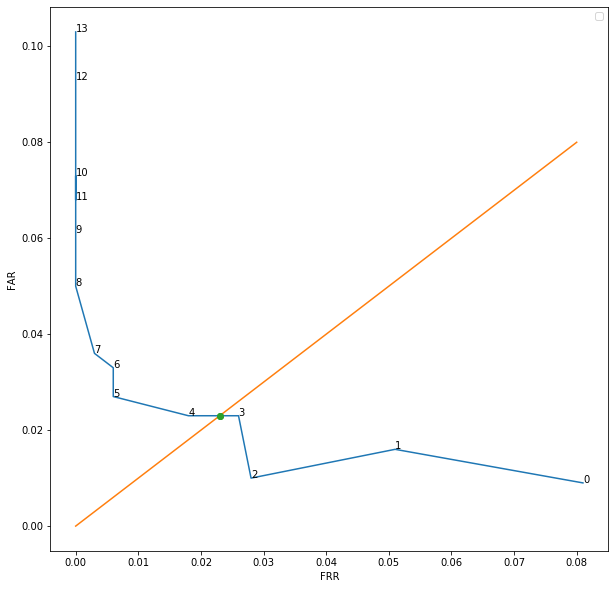

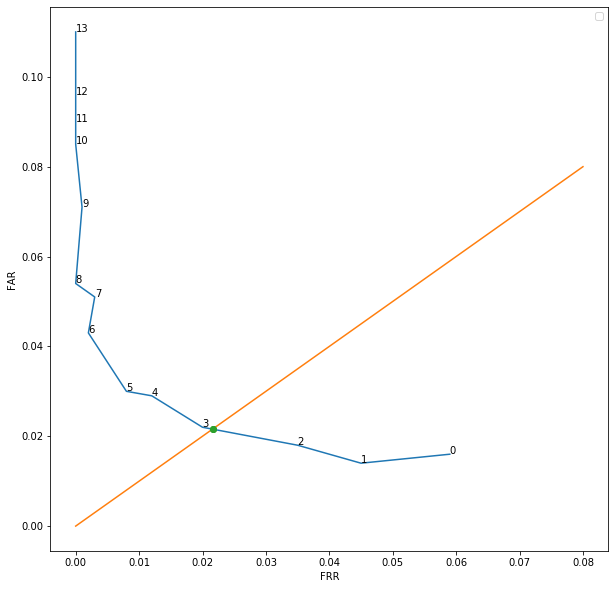

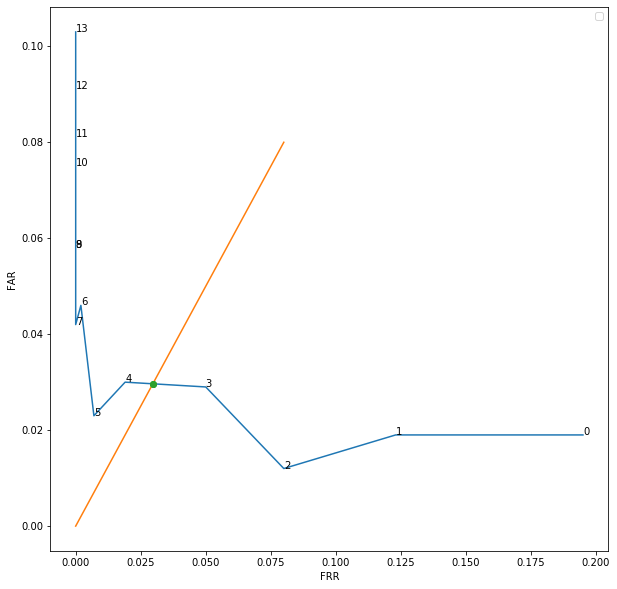

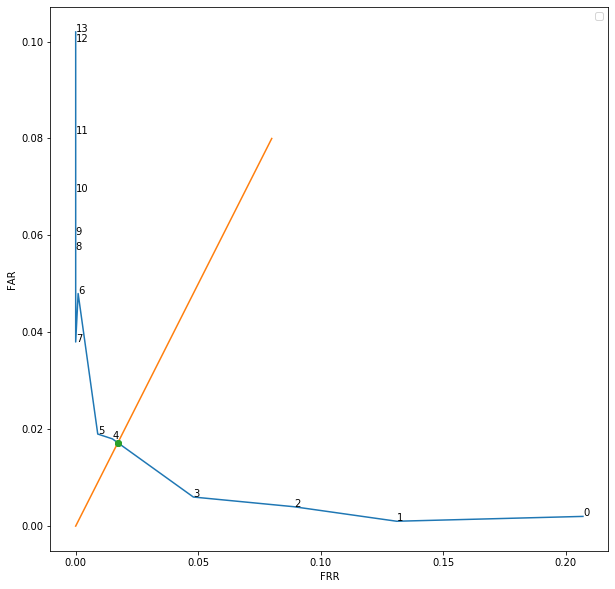

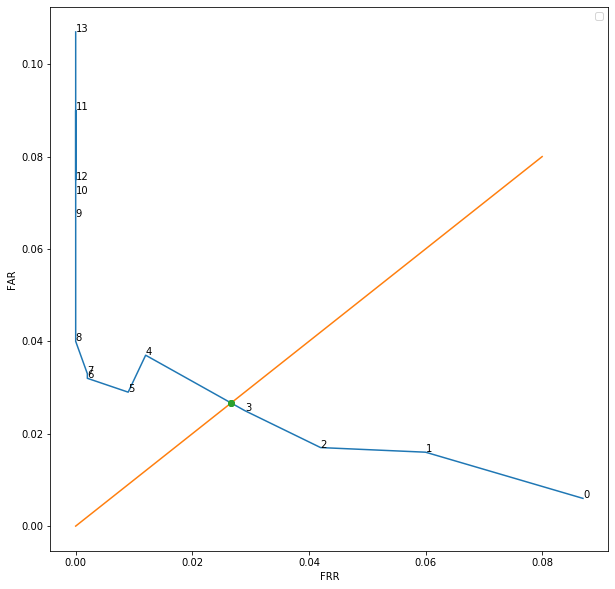

In [22]:
#1. train subject , train subject
counter_true_false_result(0,89,0,89) 

#2. train subject , new subject
counter_true_false_result(0,89, 90,108)

#3. new subject , new subject
counter_true_false_result(90,108, 0,89)

#4. new subject , new subject
counter_true_false_result(90,108, 90,108)

#5. all subject , all subject
counter_true_false_result(0,108, 0,108)